<a href="https://colab.research.google.com/github/Devacodes-dev/Machine-learning-journey/blob/main/Facial_emotion_using_python_and_deep_learning_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# STEP 1️⃣ : Basic setup
!pip install tensorflow keras opencv-python tqdm kagglehub --quiet

import os
import numpy as np
import pandas as pd
import cv2
from tqdm import tqdm
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import kagglehub

print("✅ Setup complete")

✅ Setup complete


In [ ]:
# STEP 2️⃣ : Download dataset via kagglehub
import kagglehub
path = kagglehub.dataset_download("msambare/fer2013")
print("📂 Dataset downloaded at:", path)

!ls "$path"


Using Colab cache for faster access to the 'fer2013' dataset.
📂 Dataset downloaded at: /kaggle/input/fer2013
test  train


In [ ]:
!pip install kagglehub
import kagglehub

# Download latest version of FER2013 dataset
path = kagglehub.dataset_download("msambare/fer2013")

print("Path to dataset files:", path)


Using Colab cache for faster access to the 'fer2013' dataset.
Path to dataset files: /kaggle/input/fer2013


In [ ]:
!pip install kagglehub
import kagglehub

# Download latest version of FER2013 dataset
path = kagglehub.dataset_download("msambare/fer2013")

print("Path to dataset files:", path)


Using Colab cache for faster access to the 'fer2013' dataset.
Path to dataset files: /kaggle/input/fer2013


In [ ]:
import os

print(os.listdir("/kaggle/input/fer2013"))


['test', 'train']


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = "/kaggle/input/fer2013/train"
test_dir = "/kaggle/input/fer2013/test"

# Create ImageDataGenerator for training and validation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    validation_split=0.2  # 20% of training data used for validation
)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(48, 48),
    color_mode='grayscale',
    class_mode='categorical',
    batch_size=64,
    subset='training'
)

val_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(48, 48),
    color_mode='grayscale',
    class_mode='categorical',
    batch_size=64,
    subset='validation'
)


Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

# Build CNN
model = Sequential([
    # Layer 1: Detect small patterns (edges, corners)
    Conv2D(32, (3,3), activation='relu', input_shape=(48,48,1)),
    MaxPooling2D(2,2),

    # Layer 2: Combine small patterns into bigger features
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    # Layer 3: High-level features (eyes, mouth, facial shapes)
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    # Flatten 2D feature maps into 1D vector for Dense layer
    Flatten(),

    # Dense layer: Combines features to make decision
    Dense(128, activation='relu'),
    Dropout(0.5),

    # Output layer: 7 neurons for 7 emotions
    Dense(7, activation='softmax')
])

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# See the model summary
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 355,847 (1.36 MB)

 Trainable params: 355,847 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=20
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
359/359 ━━━━━━━━━━━━━━━━━━━━ 165s 450ms/step - accuracy: 0.2383 - loss: 1.8169 - val_accuracy: 0.3496 - val_loss: 1.6180
Epoch 2/20
359/359 ━━━━━━━━━━━━━━━━━━━━ 98s 272ms/step - accuracy: 0.3797 - loss: 1.5947 - val_accuracy: 0.4463 - val_loss: 1.4563
Epoch 3/20
359/359 ━━━━━━━━━━━━━━━━━━━━ 140s 267ms/step - accuracy: 0.4412 - loss: 1.4604 - val_accuracy: 0.4754 - val_loss: 1.3751
Epoch 4/20
359/359 ━━━━━━━━━━━━━━━━━━━━ 101s 281ms/step - accuracy: 0.4745 - loss: 1.3882 - val_accuracy: 0.5004 - val_loss: 1.3173
Epoch 5/20
359/359 ━━━━━━━━━━━━━━━━━━━━ 143s 283ms/step - accuracy: 0.4841 - loss: 1.3387 - val_accuracy: 0.4954 - val_loss: 1.3116
Epoch 6/20
359/359 ━━━━━━━━━━━━━━━━━━━━ 100s 277ms/step - accuracy: 0.5100 - loss: 1.2917 - val_accuracy: 0.5267 - val_loss: 1.2563
Epoch 7/20
359/359 ━━━━━━━━━━━━━━━━━━━━ 141s 274ms/step - accuracy: 0.5208 - loss: 1.2762 - val_accuracy: 0.5297 - val_loss: 1.2424
Epoch 8/20
359/359 ━━━━━━━━━━━━━━━━━━━━ 141s 272ms/step - accuracy: 0.5346 - 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


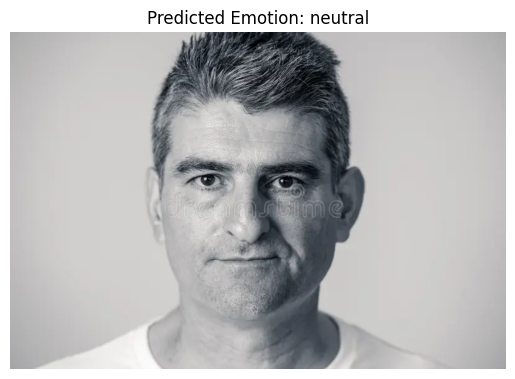

Predicted Emotion: neutral


In [ ]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os

# 🔹 Replace with your uploaded filename
img_path = "neutralmann.jpeg"   # <-- change this name to your actual image

# Load and preprocess the image
img = image.load_img(img_path, target_size=(48,48), color_mode='grayscale')
img_array = image.img_to_array(img)/255.0
img_array = np.expand_dims(img_array, axis=0)

# Predict emotion
pred = model.predict(img_array)
emotion_classes = list(train_data.class_indices.keys())
pred_label = emotion_classes[np.argmax(pred)]

# Display image and prediction
plt.imshow(cv2.imread(img_path)[...,::-1])
plt.title(f"Predicted Emotion: {pred_label}")
plt.axis('off')
plt.show()

print(f"Predicted Emotion: {pred_label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


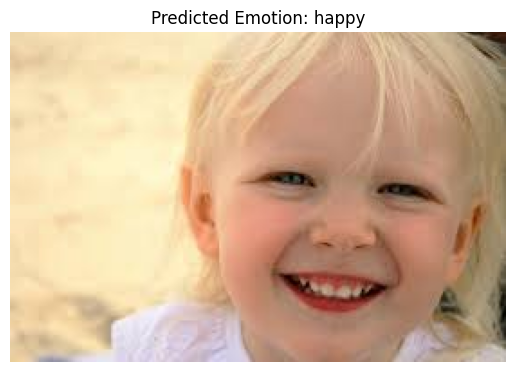

Predicted Emotion: happy


In [ ]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os

# 🔹 Replace with your uploaded filename
img_path = "/content/happyy.jpeg"   # <-- change this name to your actual image

# Load and preprocess the image
img = image.load_img(img_path, target_size=(48,48), color_mode='grayscale')
img_array = image.img_to_array(img)/255.0
img_array = np.expand_dims(img_array, axis=0)

# Predict emotion
pred = model.predict(img_array)
emotion_classes = list(train_data.class_indices.keys())
pred_label = emotion_classes[np.argmax(pred)]

# Display image and prediction
plt.imshow(cv2.imread(img_path)[...,::-1])
plt.title(f"Predicted Emotion: {pred_label}")
plt.axis('off')
plt.show()

print(f"Predicted Emotion: {pred_label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


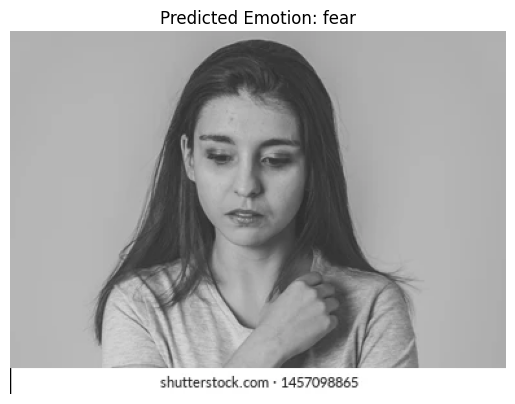

Predicted Emotion: fear


In [ ]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os

# 🔹 Replace with your uploaded filename
img_path = "fear.jpeg"
# Load and preprocess the image
img = image.load_img(img_path, target_size=(48,48), color_mode='grayscale')
img_array = image.img_to_array(img)/255.0
img_array = np.expand_dims(img_array, axis=0)

# Predict emotion
pred = model.predict(img_array)
emotion_classes = list(train_data.class_indices.keys())
pred_label = emotion_classes[np.argmax(pred)]

# Display image and prediction
plt.imshow(cv2.imread(img_path)[...,::-1])
plt.title(f"Predicted Emotion: {pred_label}")
plt.axis('off')
plt.show()

print(f"Predicted Emotion: {pred_label}")


In [ ]:
model.save("emotion_detection_model.h5")



In [ ]:
from google.colab import files
files.download("emotion_detection_model.h5")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# i cant access my webcam in my pc due to some issues so i have made the emotion detection in colab but just found there ways to download my model and run in another device with webcam facilities
# So i will just insert the code for that purpose which i can use for future purposes!!
# so maybe anyone can download my model, and run this code in pcs/laptop that supports webcam and try the real-time facial emotion detection!


from google.colab import files
files.download("emotion_detection_model.h5")


#installing the dependencies
pip install tensorflow opencv-python


import cv2
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array

# Load the trained model
model = load_model("emotion_detection_model.h5")

# Define emotion classes
emotion_classes = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

# Initialize webcam
cap = cv2.VideoCapture(0)
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

while True:
    ret, frame = cap.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    for (x, y, w, h) in faces:
        roi = gray[y:y+h, x:x+w]
        roi = cv2.resize(roi, (48,48))
        roi = roi.astype("float") / 255.0
        roi = img_to_array(roi)
        roi = np.expand_dims(roi, axis=0)

        pred = model.predict(roi)[0]
        label = emotion_classes[np.argmax(pred)]

        cv2.rectangle(frame, (x,y), (x+w, y+h), (0,255,0), 2)
        cv2.putText(frame, label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255,255,255), 2)

    cv2.imshow("Real-Time Emotion Detection", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
